In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
def plotGrayscaleImage(image):
    h,w = image.shape[:2]
    plt.imshow(image, cmap='gray')
    
def plotColorImage(image):
    b,g,r = cv2.split(image)
    image = cv2.merge([r,g,b])
    plt.imshow(image)

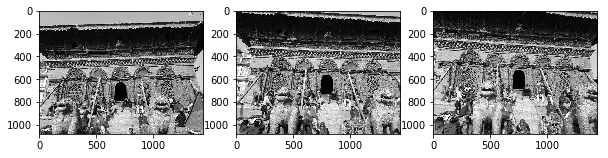

In [33]:
img1 = cv2.imread('images/1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/2.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('images/3.jpg', cv2.IMREAD_GRAYSCALE)

figure = plt.figure(figsize=(10.0, 3.0))
plt.subplot(131)
plotGrayscaleImage(img1)

plt.subplot(132)
plotGrayscaleImage(img2)

plt.subplot(133)
plotGrayscaleImage((img3))

plt.show()

In [34]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

In [35]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
kp2, des3 = sift.detectAndCompute(img3, None)

print("# kps: {}, descriptors: {}".format(len(kp1), des1.shape))

# kps: 16611, descriptors: (16611, 128)


In [36]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches12 = bf.knnMatch(des1, des2, k=2)

In [37]:
# Apply ratio test
good12 = []
for m,n in matches12:
    if m.distance > 0.75 * n.distance:
        good12.append([m])

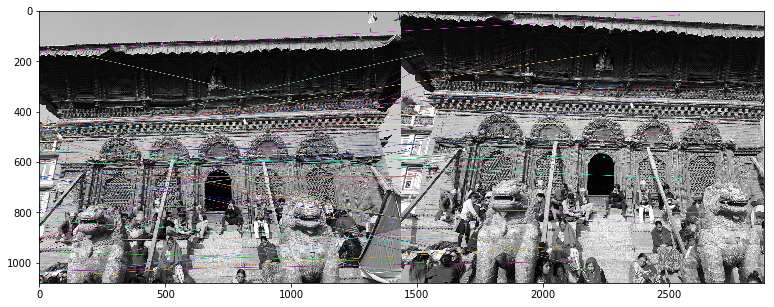

In [38]:
# cv2.drawMatchesKnn expects list of lists as matches.
img12 = cv2.drawMatchesKnn(img1,kp1, img2,kp2, good12[:50],None,flags=2)


figure = plt.figure(figsize=(20.0, 5.0))
plt.imshow(img12)
plt.show()

In [42]:
# Normalize points with K^{-1}
# (u v 1) = K^-1 * (u’ v’ 1)
# K is the calibration matrix in intrinsics.txt
# K = [1123.26 0      706.85]
#      0      1123.26 542.07]
#      0        0        1]

K = np.array([
    [1123.26, 0, 706.85],
    [0, 1123.26, 542.07],
    [0, 0, 1]
])



array([[1.12326e+03, 0.00000e+00, 7.06850e+02],
       [0.00000e+00, 1.12326e+03, 5.42070e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00]])